In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# NLP notes

NLP - Making sense of language using statistics and computers  
Application - Topic Identification and Text Classification, Chatbots, Translation and Sentiment Analysis

## Regular Expressions

__Regular expressions__ are strings with special syntax, allows us to match patterns in other strings  
A __pattern__ is series of letters or symbols which can map to an actual text or words or punctuation

__Applications of Regex:__ 
- Find all web links in a document
- Parse email addresses, remove/replace email addresses
- Remove unwanted strings or characters

__Python library of Regex:__ _import re_

__Match a substring by using re.match:__ 
_re.match('abc', 'abcdef')_, here pattern is the first argument and the string is the second argument and returns the match object (in this case 'abc')


__Common Regex Patterns__  

|pattern   |matches   |example   |
|----------|----------|----------|
|\w+       | word     | 'Magic'  |
|\d        | digit    | 2        |
|\s        | spaces   | ' '      |
| .*       | wildcard |'username74|          
| + or *   |greedy match| 'aaaa'|
| \S       | not space | 'no_spaces'|
| [a-z]    |lower case group| 'abcd'|


__Greedy match__ = grabbing repeats of single letters or whole patterns. For exmaple, to match a full word rather than one character, we need to add the + symbol after \w.

__re Module__

- split: split a string on regex
- findall: find all patterns in a string
- search: search for a pattern
- match: match an entire string or substring based on a pattern

## Tokenization

Is a process of transforming a string or document into smaller chunks called tokens. It is step for preparing a text for NLP.There are rules to create tokenizations and one can create their own rules.
Some examples:
- Breaking out words or sentences
- Separating punctuation
- Separating all hashtags in a tweet

__Library used__: nltk (natural language kit), _from nltk.tokenize import word_tokenize_

__Why tokenize?__
- Easier to map part of speech
- Matching common words
- Removing unwanted tokens

Other __tokenizers in nltk library__:
- sent_tokenize: tokenize a document into sentences
- regexp_tokenize: tokenize a string or document based on a regular expression pattern
- TweetTokenizer: special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation points!!!

__OR method in regex__: Represented by |
To use the OR you can define a group using parenthesis. Groups can be either a pattern or a set of characters you want to match. You can define explicit character ranges using []

__Regex ranges and groups:__

|pattern	|matches	|example|
|----------|--------|---------|
|[A-Za-z]+	|upper and lowercase English alphabet|	'ABCDEFghijk'|
|[0-9]	|numbers from 0 to 9	|9|
|[A-Za-z\-\.]+|	upper and lowercase English alphabet, - and .	|'My-Website.com'|
|(a-z)	|a, - and z	|'a-z'|
|(\s+l,)|	spaces or a comma|	', '|

Hyphen and period are special characters in regex. To use the actual hyphen and period we must use an escape character before. so \- and \.
Whatever is placed within the paranthesis is exclusively matched.

## Charting word length with NLTK

Using chart with NLP tools. Matplotlib has advanced features like generating 3D graphs and animations.

Combining NLP data extraction with plotting:
- from matplotlib import pyplot as plt
- from nltk.tokenize import word_tokenize
- Next tokenize the words and punctuation in a short sentence and finally use python list comprehension with tokenized words array to transform it to a list of lengths.
  - words = word_tokenize("This is a pretty cool tool!")
  - word_lengths = [len(w) for w in words]
- next we pass the array of token lengths to the hist function to generate the histogram chart
  - plt.hist(word_lengths)
  - plt.show()
   

## Word counts with bag of words approach

__Bag of words__ - simple and basic method to finding topics in a text. 
- Need to first create tokens using tokenization and then count up all the tokens
- The theory is the more frequent a word, the more important it might be. 
- Can be a great way to determine the significant words in a text.

__Bag-of-words in Python:__  
__- from nltk.tokenize import word_tokenize__  
__- from collections import Counter__  
- the list of word tokens geberated using word_tokenize can be passed as the initialization argument for the counter class. Result is a counter object which has a structure similar to a dictionary and allows us to each token and its frequency
  - Counter(word_tokenize(
                """The cat is in the box. The cat likes the box. 
                 The box is over the cat."""))
- Counter objects also have a method called most_common. Below gives us top 2 tokens in terms of frequency. The return object is a series of tuples inside a list. For each tuple, 1st element is the token, 2nd is the frequency.
  - counter.most_common(2)


## Simple Text Processing

__Why preprocess?__
- Helps make for better input data when performing machine learning or other statistical methods
- Examples:
  - Tokenization to create a bag of words
  - Lowercasing words
- Lemmatization/Stemming
  - Shorten words to their root stems
- Removing stop words (words that don't have any meaning), punctuation, or unwanted tokens
- Good to experiment with different approaches

__Text preprocessing with Python__
- from ntlk.corpus import stopwords
- text = """The cat is in the box. The cat likes the box. The box is over the cat."""
- tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
- w.isalpha - only returns if it has alphabet strings, strips numbers and symbols
- no_stops = [t for t in tokens if t not in stopwords.words('english')]
- Above removes stopwords. stop words list for english comes built in with nltk library 
- Counter(no_stops).most_common(2)

__Lemmatization__
- from nltk.stem import WordNetLemmatizer 


## Gensim

- Is a popular open-source NLP library
- Uses top academic models to perform complex tasks
- Building document or word vectors
- Performing topic identification and document comparison

__Word vector:__
A word embedding or vector is trained from a larger corpus and is a multidimensional represention of a word or document. You can think of it as a multidimensional array normally with sparse features (lots of zeroes and some ones). With these vectors we can then see relationships among the words or documents based on how near or far they are and also what similar comparisons we find. 

**Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus.**

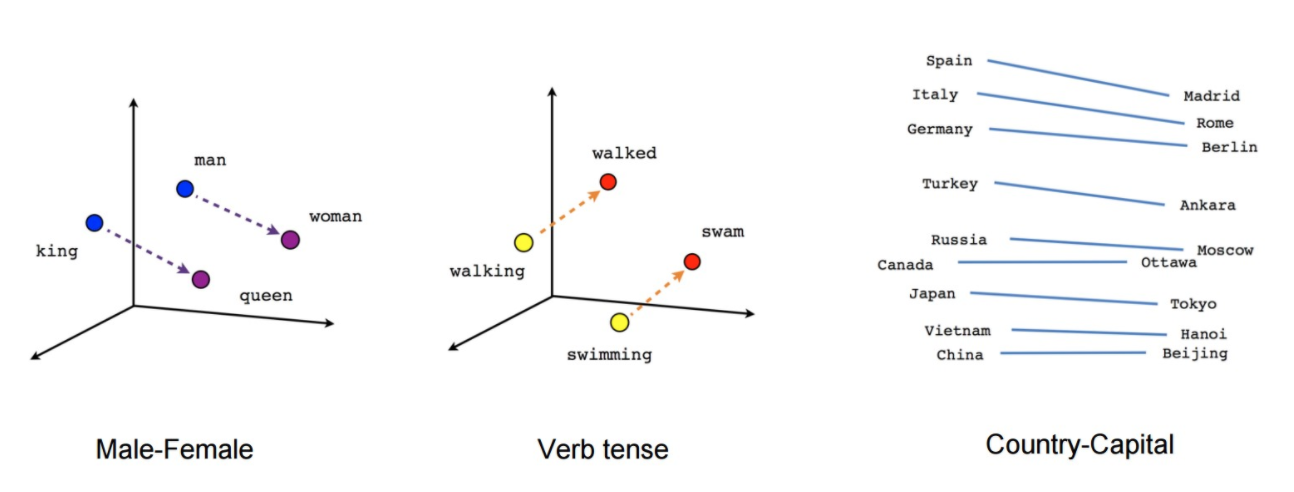

In [4]:
from IPython.display import Image
Image(filename='nlpfig1.png')

__LDA visualization__
LDA stands for latent dirichlet allocation and it is a statistical model we can apply to text using Gensim for topic analysis and modelling

__Creating a Gensim dictionary__ allows you to build corpora and dictionaries using simple classes and functions
- from gensim.corpora.dictionary import Dictionary
- from nltk.tokenize import word_tokenize
- A __Corpus__ (plural, corpora) is a set of text used to help perform NLP tasks
- my_documents = ['The movie was about a spaceship and aliens.','I really liked the movie!','Awesome action scenes, but boring characters.','The movie was awful! I hate alien films.', 'Space is cool! I liked the movie.','More space films, please!',]
- tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
- above we are only doing tokenizing and lower case
- dictionary = Dictionary(tokenized_docs)
- above we passed the tokenized docs to the Gensim dictionary class. This will create a mapping with an id for each token. This is the beginning of our corpus. We can now represent whole documents using just a list of their token ids and how often those token ids appear in each document. 
- to look at the token and their ids by using token2id attribute, which gives a dictionary
- dictionary.token2id
- Output: {'!': 11,',': 17,'.': 7,'a': 2,...}
- Using the above dictionary we can create a Gensim corpus
- corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
- Output of corpus is a list of lists, each list representing one document. Each document is a series of tuples, the first item representing the tokenid from the dictionary and the second item representing the token frequency in the document.

__Gensim__ uses a simple bag-of-words model whoch transforms each document into a bag of words using the token ids and the frequency of each token in the document.

Unlike the counter based bag of words, the Gensim model can be easily saved, updated, and reused

### Tf-idf model with Gensim

Stands for term-frequency - inverse document frequency, is an NLP model which allows you to determine the most important words in each document in the corpus
The idea behind tf-idf is that each corpus may have more shared words then just stopwords
These common words are like stopwords and should be removed or down-weighted in importance
For Ex: If i an astronomer, sky might be used often but is not important so we should down-weigh that word.
Tf-idf ensures most common words don't show up as key words and keeps document specific frequent words weighted high

### Formula for tf-idf

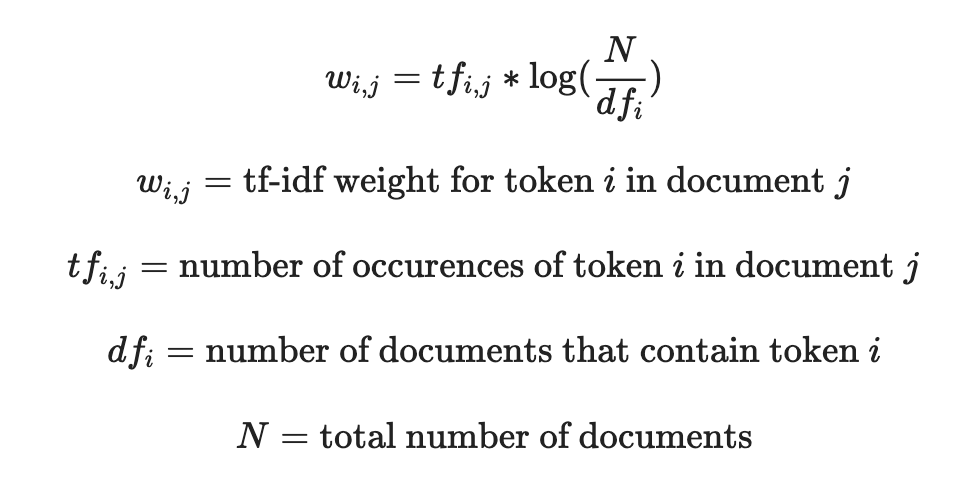

In [6]:
from IPython.display import Image
Image(filename='nlpfig2.png')

The weight will be low if 
- tf(i,j) is low, number of times the token appears is low
- if the logarithm is close to zero, meaning the internal equation is zero. So if N/df is close to one, its log will be close to zero. So words that occur across many or all documents will have a very low tf-idf weight

We can use bag-of-words corpus to translate it into a tf-idf model by simply passing it in initialization. We can then reference each document by using it like a dictionary key with our new tf-idf model. The weights can help you determine good topics and keywords for a corpus with shared vocabulary. 

## Named Entity Recognition (NER)

NER is a NLP task used to identify